In [4]:
!pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 53.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=058b264b2b2d39bfd6cf4e00a56becc400b012830fc32adf054e81a0d83a1a57
  Stored in directory: /home/jovyan/.cache/pip/wheels/42/d6/84/bf57a755f4569494cd00de4bb46ef064874823f4d19c82e960
  Created wheel for peewee: filename=peewee-3.18.2-cp311-cp311-linux_x86_64.whl size=300894 sha256=b0ff797a0470bd3e9c8a007dac42b85ca98018fe1013a9962de24d883d77742e
  Stored in directory: /home/jovyan/.cache/pip/wheels/28/84/61/758d1bd7b9c9d700158c8642a8aff2a9bf2e1ae69641c40784
Successfully built multitasking peewee


In [5]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [8]:
#Download of Data, e.g. of Apple and Microsoft
tickers = ['AAPL', 'MSFT']
start_date = '2018-01-01'
end_date = '2023-12-31'

data = yf.download(tickers, start=start_date, end=end_date)['Close']

print(data.head()) #prints first few rows

/tmp/ipykernel_326/70334796.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Ticker           AAPL       MSFT
Date                            
2018-01-02  40.381001  79.198334
2018-01-03  40.373970  79.566910
2018-01-04  40.561497  80.267204
2018-01-05  41.023312  81.262375
2018-01-08  40.870937  81.345284


In [9]:
#Calculating portfolio returns

weights = np.array([0.5, 0.5]) #normalise the weights, 50% Apple, 50% Microsoft

returns = data.pct_change().dropna() #daily returns

portfolio_returns = returns.dot(weights) #portfolio daily returns



In [10]:
#Historical VaR

confidence_level = 0.99 #99% confidence

hist_var = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

In [12]:
#Parametric (Variance-Covariance) VaR

mean = np.mean(portfolio_returns)
std_dev = np.std(portfolio_returns)

param_var = norm.ppf(1 - confidence_level, mean, std_dev)

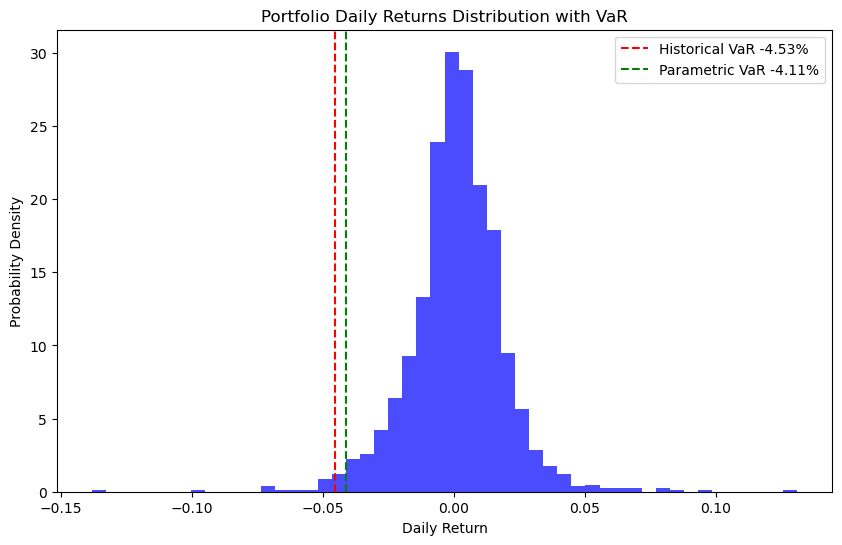

Historical VaR (99%): -4.53%
Parametric VaR (99%): -4.11%


In [20]:
#Plot Distribution

plt.figure(figsize = (10,6))
plt.hist(portfolio_returns, bins = 50, density = True, alpha = 0.7, color = 'blue')

#VaR Cutoffs
plt.axvline(hist_var, color = 'red', linestyle = '--', label = f'Historical VaR {hist_var:.2%}')
plt.axvline(param_var, color = 'green', linestyle = '--', label = f'Parametric VaR {param_var:.2%}')

plt.title('Portfolio Daily Returns Distribution with VaR')
plt.xlabel('Daily Return')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

print(f'Historical VaR (99%): {hist_var:.2%}')
print(f'Parametric VaR (99%): {param_var:.2%}')
